En este protecto trabajaremos con un dataset de laptops diseñadas para el año 2024. El principal objetivo es practicar la limpieza y transformación de los datos.

Importamos nuestras librerías

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


Cargamos nuestro dataset y vemos las primeras filas

In [49]:
df = pd.read_csv('best_buy_laptops_2024.csv')
print(df.head())

       brand              model  aggregateRating/ratingValue  \
0       Dell  i7430-7374SLV-PUS                          4.7   
1       Dell  i3520-5810BLK-PUS                          4.6   
2     Lenovo         82YL0002US                          4.7   
3  Microsoft          DTI-00001                          4.7   
4  Microsoft          R1S-00062                          4.7   

   aggregateRating/reviewCount  offers/price offers/priceCurrency  depth  \
0                       1088.0           NaN                  USD   8.92   
1                        839.0           NaN                  USD   9.27   
2                        127.0           NaN                  USD   8.76   
3                        926.0           NaN                  USD   7.90   
4                        422.0           NaN                  USD   8.80   

   width                             features/0/description  \
0  12.36  Windows 11 brings back the Start Menu from Win...   
1  14.11  Experience the most se

Obtenemos mayor información de cada una de sus columnas y apreciamos sus tipo de datos y si existen valores nulos

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        489 non-null    object 
 1   model                        488 non-null    object 
 2   aggregateRating/ratingValue  357 non-null    float64
 3   aggregateRating/reviewCount  357 non-null    float64
 4   offers/price                 262 non-null    float64
 5   offers/priceCurrency         489 non-null    object 
 6   depth                        431 non-null    float64
 7   width                        431 non-null    float64
 8   features/0/description       486 non-null    object 
 9   features/1/description       483 non-null    object 
dtypes: float64(5), object(5)
memory usage: 38.3+ KB


Verificamos que el tipo de dato es el correcto para cada columna por lo cual seguimos con la revisión de los datos nulos.

Contamos la cantidad de valores nulos por columna

In [51]:
df.isnull().sum()

brand                            0
model                            1
aggregateRating/ratingValue    132
aggregateRating/reviewCount    132
offers/price                   227
offers/priceCurrency             0
depth                           58
width                           58
features/0/description           3
features/1/description           6
dtype: int64

Existen varias opciones para trabajar con valores nulos. Las principales son:
1. Borrar las filas que contienen valores nulos
2. Rellenar con algun valor los datos nulos
3. Completar con el valor a continuación o que seguiría en el valor nulo

1. Aquí probaremos eliminado las filas con valores nulos, pero nos daremos cuenta de que nos quedamos con muy pocos datos para trabajar.

In [52]:
df_drop = df.dropna()
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 13 to 486
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        95 non-null     object 
 1   model                        95 non-null     object 
 2   aggregateRating/ratingValue  95 non-null     float64
 3   aggregateRating/reviewCount  95 non-null     float64
 4   offers/price                 95 non-null     float64
 5   offers/priceCurrency         95 non-null     object 
 6   depth                        95 non-null     float64
 7   width                        95 non-null     float64
 8   features/0/description       95 non-null     object 
 9   features/1/description       95 non-null     object 
dtypes: float64(5), object(5)
memory usage: 8.2+ KB


2. Probaremos rellenado los valores nulos con la mediana de cada columna

In [53]:
df2 = df.fillna(df.median())
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        489 non-null    object 
 1   model                        488 non-null    object 
 2   aggregateRating/ratingValue  489 non-null    float64
 3   aggregateRating/reviewCount  489 non-null    float64
 4   offers/price                 489 non-null    float64
 5   offers/priceCurrency         489 non-null    object 
 6   depth                        489 non-null    float64
 7   width                        489 non-null    float64
 8   features/0/description       486 non-null    object 
 9   features/1/description       483 non-null    object 
dtypes: float64(5), object(5)
memory usage: 38.3+ KB


In [54]:
df2.isnull().sum()

brand                          0
model                          1
aggregateRating/ratingValue    0
aggregateRating/reviewCount    0
offers/price                   0
offers/priceCurrency           0
depth                          0
width                          0
features/0/description         3
features/1/description         6
dtype: int64

Como podemos ver siguen quedando unos datos nulos que son de las columnas no numericas, pero como son pocos datos eliminaremos esas filas.

In [55]:
df2_drop = df2.dropna()
df2_drop.isnull().sum()

brand                          0
model                          0
aggregateRating/ratingValue    0
aggregateRating/reviewCount    0
offers/price                   0
offers/priceCurrency           0
depth                          0
width                          0
features/0/description         0
features/1/description         0
dtype: int64

Lo otro que debemos hacer para limpiar nuestros datos es identificar si tenemos outliers. Con el describe() podemos fijarnos en su media, desviación estándar, mediana y sus máximos y mínimos de cada columna numérica para darnos una idea.

In [56]:
df2_drop.describe()

,aggregateRating/ratingValue,aggregateRating/reviewCount,offers/price,depth,width
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,4.474583,194.095833,1079.111417,9.617312,11.993104
std,0.544339,533.625688,577.798917,2.741921,3.156843
min,1.000000,1.000000,143.990000,0.490000,0.580000
25%,4.500000,5.000000,949.990000,8.775000,11.652500
50%,4.600000,18.000000,959.990000,9.220000,12.510000
75%,4.700000,123.250000,1007.490000,10.082500,14.020000
max,5.000000,4231.000000,4489.990000,20.250000,18.100000


También podemos graficar rápidamente con hist() para ver como se comportan nuestros datos y visualizar de manera gráfica nuestros outliers

array([[<AxesSubplot:title={'center':'aggregateRating/ratingValue'}>,
        <AxesSubplot:title={'center':'aggregateRating/reviewCount'}>],
       [<AxesSubplot:title={'center':'offers/price'}>,
        <AxesSubplot:title={'center':'depth'}>],
       [<AxesSubplot:title={'center':'width'}>, <AxesSubplot:>]],
      dtype=object)

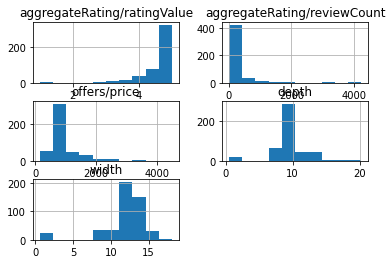

In [57]:
df2_drop.hist()

Como pudimos apreciar con los codigos anteriores las tres primeras columnas presentan otliers pero parecen estar dentro de un margen que no tuviera error. Por ejemplo un rating de 1 a 5, reviews que van desde 1 a 4231 y precios que van desde 143 a 4489. Pero por otro lado las medidas de las siguientes dos columnas parecen ser extrañas al ser muy pequeños sus minimos. Por esto las graficaremos en un boxplot.

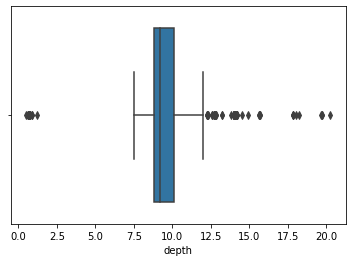

In [58]:
sns.boxplot(x=df2_drop['depth'])
plt.show()

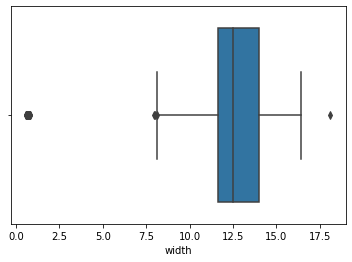

In [59]:
sns.boxplot(x=df2_drop['width'])
plt.show()

Para tratar los outliers también existen diversas maneras como por ejemplo:
1. Eliminar Outliers
2. Transformar los datos
3. Imputar los datos
Entre otros.

Eliminaremos los Outliers mayores y menores a 3 desviaciones estandar

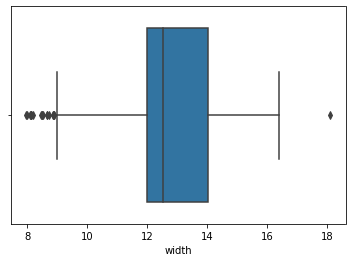

In [70]:
df3_drop = df2_drop

z_scores = stats.zscore(df3_drop.width) # Calculamos z-scores

outliers = df3_drop[np.abs(z_scores) > 3] # Identificamos outliers

df3_drop = df3_drop[~df3_drop.isin(outliers)] # Eliminamos outliers

# Visualizamos el resultado
sns.boxplot(x=df3_drop.width)
plt.show()

Ahora veremos como quedaron nuestros estadisticos de la columna width

In [72]:
df3_drop.width.describe()

count    455.000000
mean      12.613429
std        1.763426
min        7.950000
25%       12.000000
50%       12.510000
75%       14.020000
max       18.100000
Name: width, dtype: float64

Podemos ver que se eliminaron esos mínimos que no encontrabamos normales en nuestra base y también se redujo la desviación estandar de nuestra columna. Por otro lado podemos ver que nuestra cantidad de datos también disminuyó, pero no de manera considerativa.